**1. Importing Libraries**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier


**2. Load & prepare dataset**

In [2]:
iris = load_iris()
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['species'] = iris.target
df['species'] = df['species'].map({0: 'setosa', 1: 'versicolor', 2: 'virginica'})
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


**3. Data Explorartion**

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   species            150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [4]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [5]:
df['species'].value_counts()

,count
species,
setosa,50
versicolor,50
virginica,50


**4. Data Visualization**

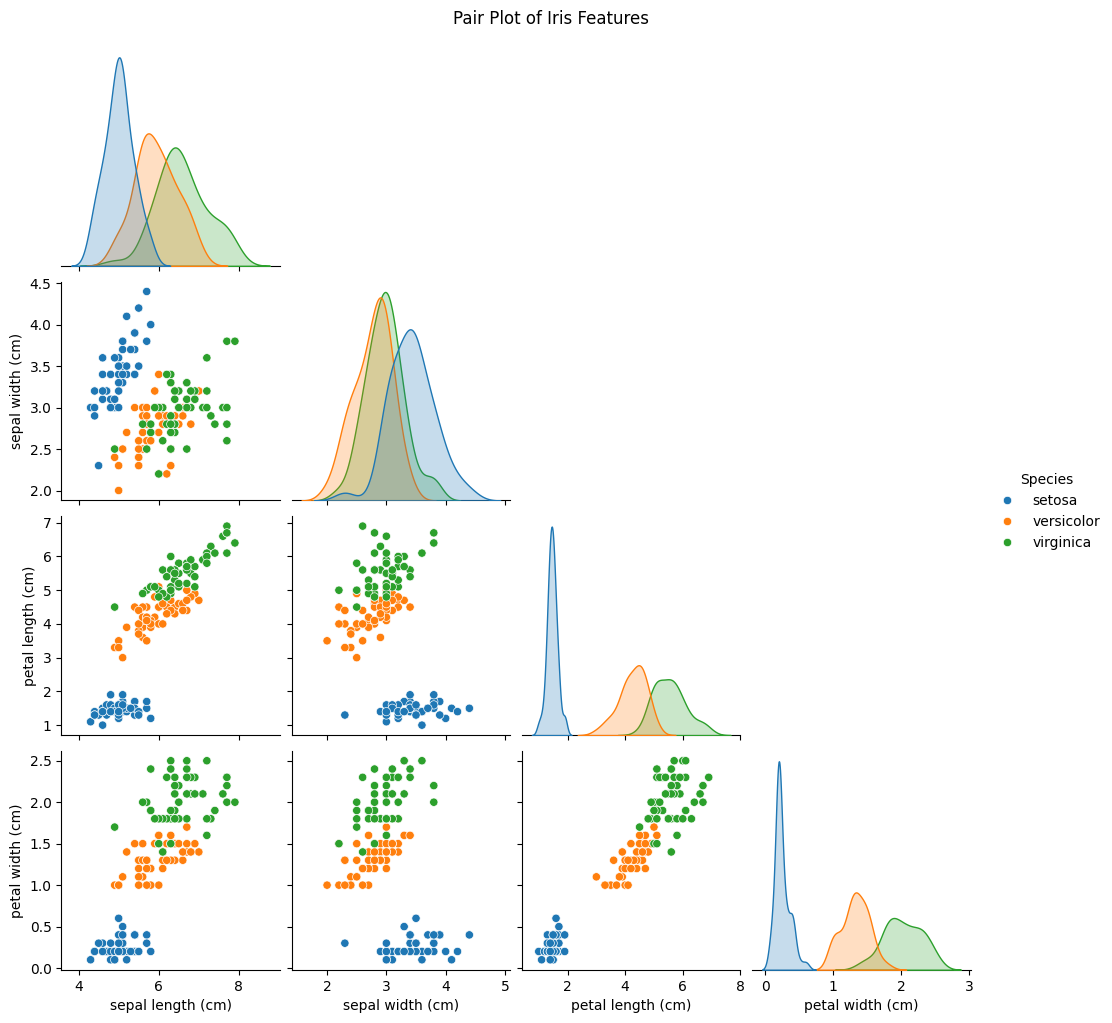

In [6]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

# Load data
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['Species'] = pd.Categorical.from_codes(iris.target, iris.target_names)

# Pair plot
sns.pairplot(df, hue='Species', corner=True)
plt.suptitle("Pair Plot of Iris Features", y=1.02)
plt.show()

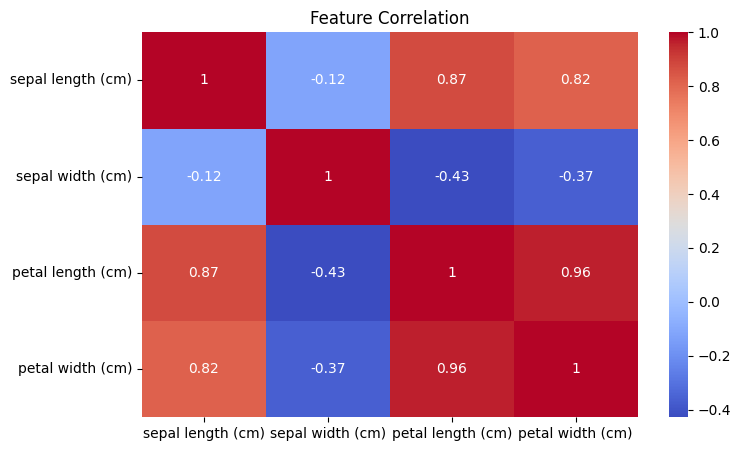

In [8]:
# Heatmap
plt.figure(figsize=(8, 5))
sns.heatmap(df.drop('Species', axis=1).corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation")
plt.show()

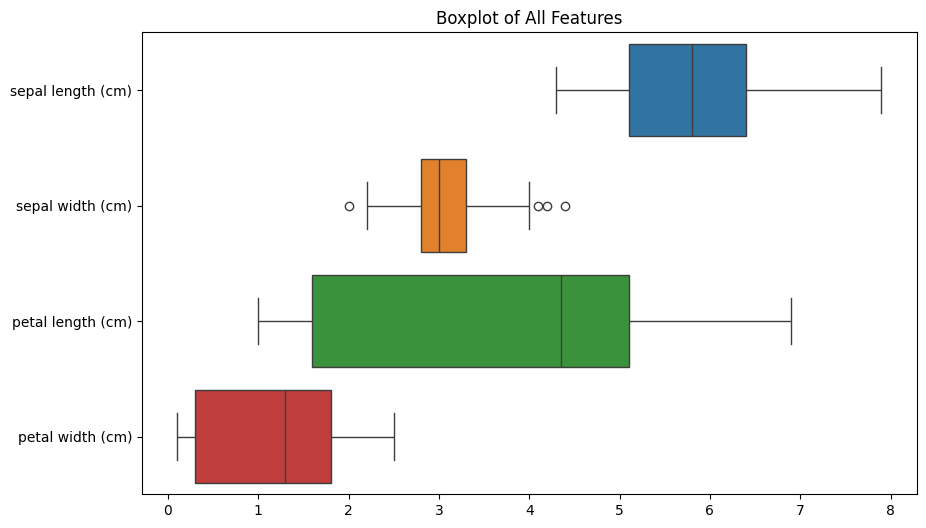

In [9]:
# Box Plot
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, orient="h")
plt.title("Boxplot of All Features")
plt.show()

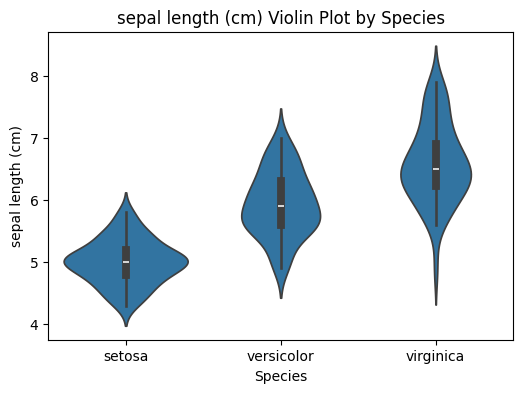

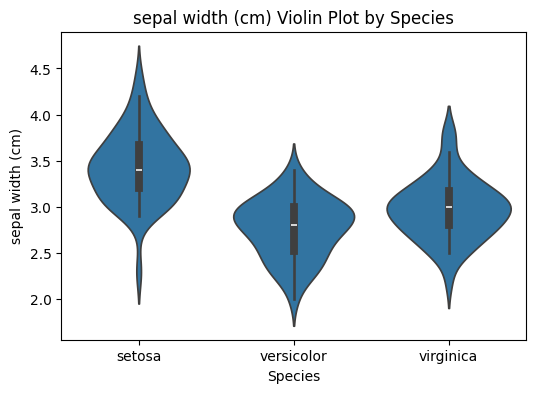

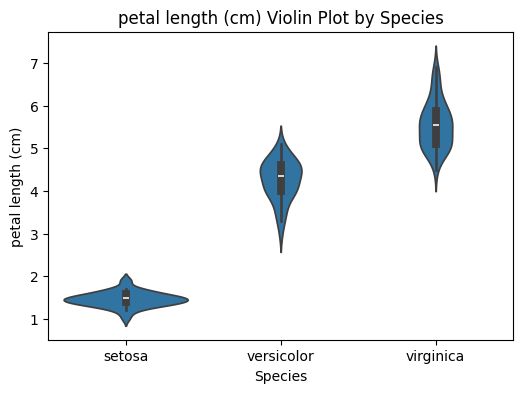

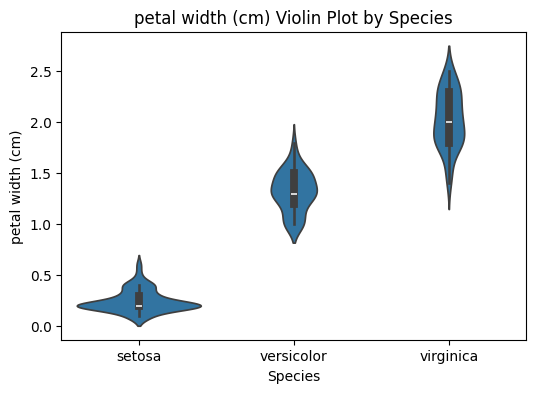

In [10]:
#violin plot
for col in iris.feature_names:
    plt.figure(figsize=(6, 4))
    sns.violinplot(x='Species', y=col, data=df)
    plt.title(f'{col} Violin Plot by Species')
    plt.show()

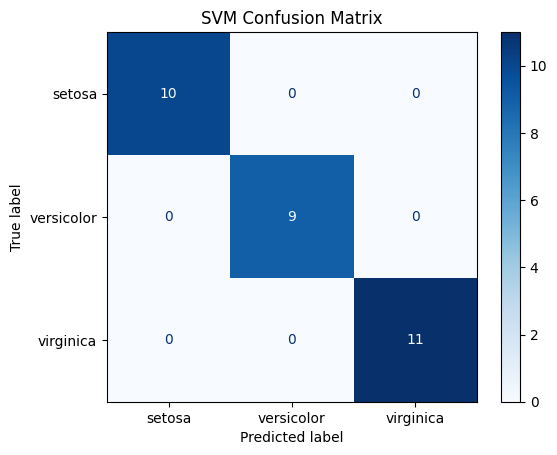

In [12]:
#confusion matrix - svm example
# Import required libraries
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Load the iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the SVM model
svm_model = SVC(kernel='linear')
svm_model.fit(X_train, y_train)

# Predict using the test set
y_pred = svm_model.predict(X_test)

# Create and display the confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=iris.target_names)
disp.plot(cmap='Blues')
plt.title("SVM Confusion Matrix")
plt.show()

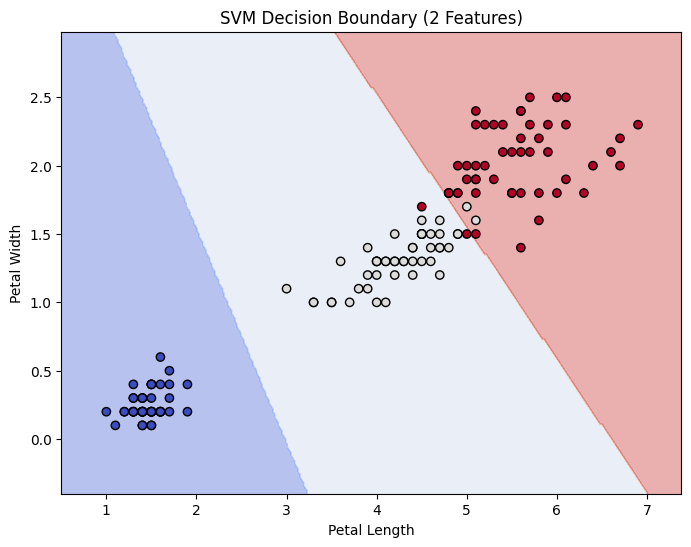

In [13]:
#Decision boundaries using 2 features - petal length & width
import numpy as np

# Select 2 features
X = iris.data[:, [2, 3]]  # petal length and width
y = iris.target

# Train
model = SVC(kernel='linear')
model.fit(X, y)

# Plot
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))

Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, alpha=0.4, cmap=plt.cm.coolwarm)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, edgecolors='k')
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.title('SVM Decision Boundary (2 Features)')
plt.show()

**5. Preprocessing**

In [15]:
X = df.drop('Species', axis=1)
y = df['Species']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

**6. Train multiple models**

In [16]:
# Importing libraries
import pandas as pd
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

# Classifiers
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

# Load iris dataset
iris = datasets.load_iris()
X = iris.data
y = iris.target

# Split into train and test (80/20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize models
models = {
    "KNN": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Logistic Regression": LogisticRegression(max_iter=200),
    "Random Forest": RandomForestClassifier(random_state=42),
    "SVM": SVC(kernel='linear')
}

# Train and evaluate each model
accuracy_results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    accuracy_results[name] = acc
    print(f"{name} Accuracy: {acc:.2f}")

KNN Accuracy: 1.00
Decision Tree Accuracy: 1.00
Logistic Regression Accuracy: 1.00
Random Forest Accuracy: 1.00
SVM Accuracy: 0.97


In [17]:
from sklearn.svm import SVC

# Use RBF kernel instead of linear
svm_model = SVC(kernel='rbf', gamma='scale')
svm_model.fit(X_train, y_train)
y_pred = svm_model.predict(X_test)

# Check accuracy
from sklearn.metrics import accuracy_score
print("SVM (RBF Kernel) Accuracy:", accuracy_score(y_test, y_pred))


SVM (RBF Kernel) Accuracy: 1.0


**7. Evaluate best model - SVM**

In [18]:
best_model = SVC()
best_model.fit(X_train, y_train)

y_train_pred = best_model.predict(X_train)
y_test_pred = best_model.predict(X_test)

**8. Confusion Matrix for train & test**

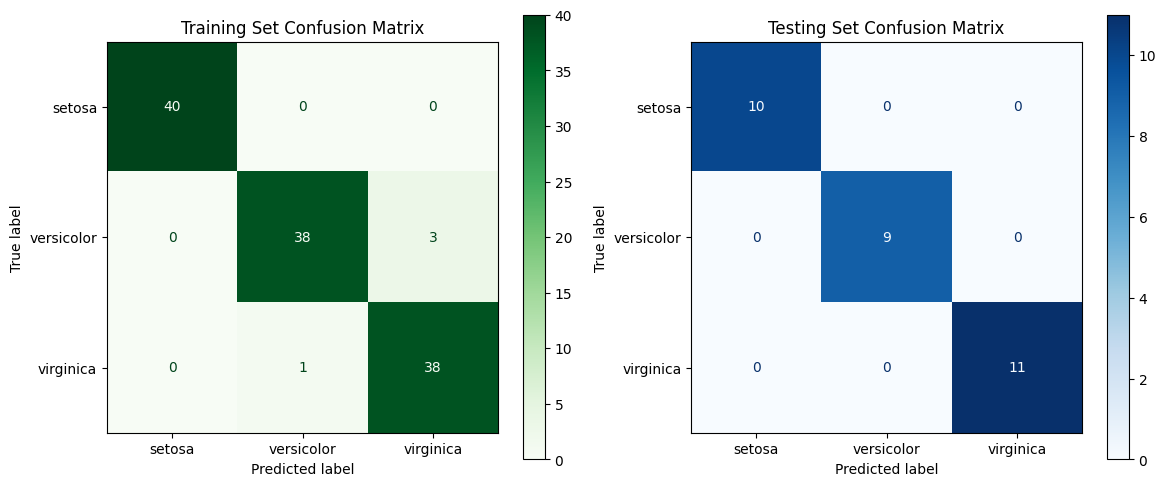

In [19]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Train
ConfusionMatrixDisplay(confusion_matrix(y_train, y_train_pred), display_labels=iris.target_names).plot(ax=axes[0], cmap='Greens')
axes[0].set_title("Training Set Confusion Matrix")

# Test
ConfusionMatrixDisplay(confusion_matrix(y_test, y_test_pred), display_labels=iris.target_names).plot(ax=axes[1], cmap='Blues')
axes[1].set_title("Testing Set Confusion Matrix")

plt.tight_layout()
plt.show()

**9. Classification reports**

In [20]:
print("Classification Report - Train:\n", classification_report(y_train, y_train_pred))
print("Classification Report - Test:\n", classification_report(y_test, y_test_pred))

Classification Report - Train:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        40
           1       0.97      0.93      0.95        41
           2       0.93      0.97      0.95        39

    accuracy                           0.97       120
   macro avg       0.97      0.97      0.97       120
weighted avg       0.97      0.97      0.97       120

Classification Report - Test:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



**10. Cross validation**

In [21]:
scores = cross_val_score(best_model, X, y, cv=5)
print("Cross-validation scores:", scores)
print("Average CV Score:", np.mean(scores))

Cross-validation scores: [0.96666667 0.96666667 0.96666667 0.93333333 1.        ]
Average CV Score: 0.9666666666666666


**11. GridSearchCV + Cross-validation**

In [22]:
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.svm import SVC
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load and split data
iris = load_iris()
X = iris.data
y = iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define parameter grid
param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto']
}

# GridSearch with 5-fold Cross Validation
grid = GridSearchCV(SVC(), param_grid, cv=5, scoring='accuracy')
grid.fit(X_train, y_train)

# Best model and parameters
print("Best Parameters:", grid.best_params_)
print("Best CV Score:", grid.best_score_)

# Test set performance
from sklearn.metrics import accuracy_score, classification_report

best_model = grid.best_estimator_
y_pred = best_model.predict(X_test)

print("Test Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Best Parameters: {'C': 10, 'gamma': 'scale', 'kernel': 'linear'}
Best CV Score: 0.9583333333333334
Test Accuracy: 0.9666666666666667
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.89      0.94         9
           2       0.92      1.00      0.96        11

    accuracy                           0.97        30
   macro avg       0.97      0.96      0.97        30
weighted avg       0.97      0.97      0.97        30



**12. Hyperparameter tuning - svm example**

In [23]:
params = {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf', 'poly']}
grid = GridSearchCV(SVC(), param_grid=params, cv=5)
grid.fit(X_train, y_train)

print("Best Parameters:", grid.best_params_)
print("Best CV Score:", grid.best_score_)

Best Parameters: {'C': 10, 'kernel': 'linear'}
Best CV Score: 0.9583333333333334


**13. Feature importance - tree based models**

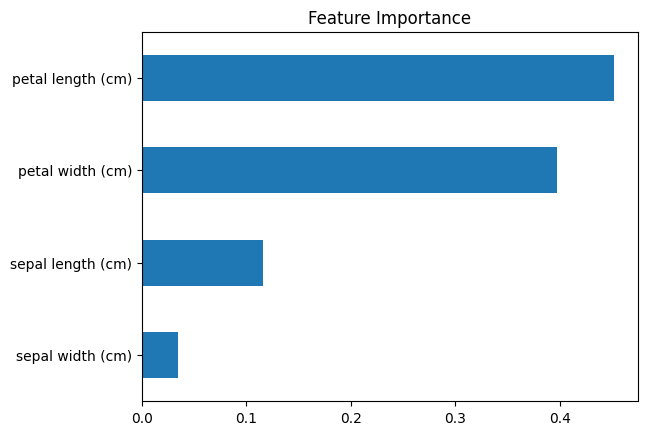

In [24]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

importances = pd.Series(rf.feature_importances_, index=iris.feature_names)
importances.sort_values().plot(kind='barh', title="Feature Importance")
plt.show()

**14. Summary**

- Explored the Iris dataset and visualized feature relationships.
- Trained and evaluated 5 ML models.
- SVM gave high accuracy; confusion matrices showed balanced predictions.
- Used GridSearchCV and Cross Validation for reliable performance.
- Feature importance showed Petal features are most significant.